# Loan Approval Prediction

In [70]:
import pandas as pd
import numpy as np
from pathlib import Path

In [71]:
data_path =  Path("./data")

In [72]:
data = pd.read_csv(data_path / "train.csv")

## EDA

In [73]:
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [74]:
data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [109]:
data.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

## Visualizations

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>],
       [<Axes: title={'center': 'person_emp_length'}>,
        <Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>],
       [<Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

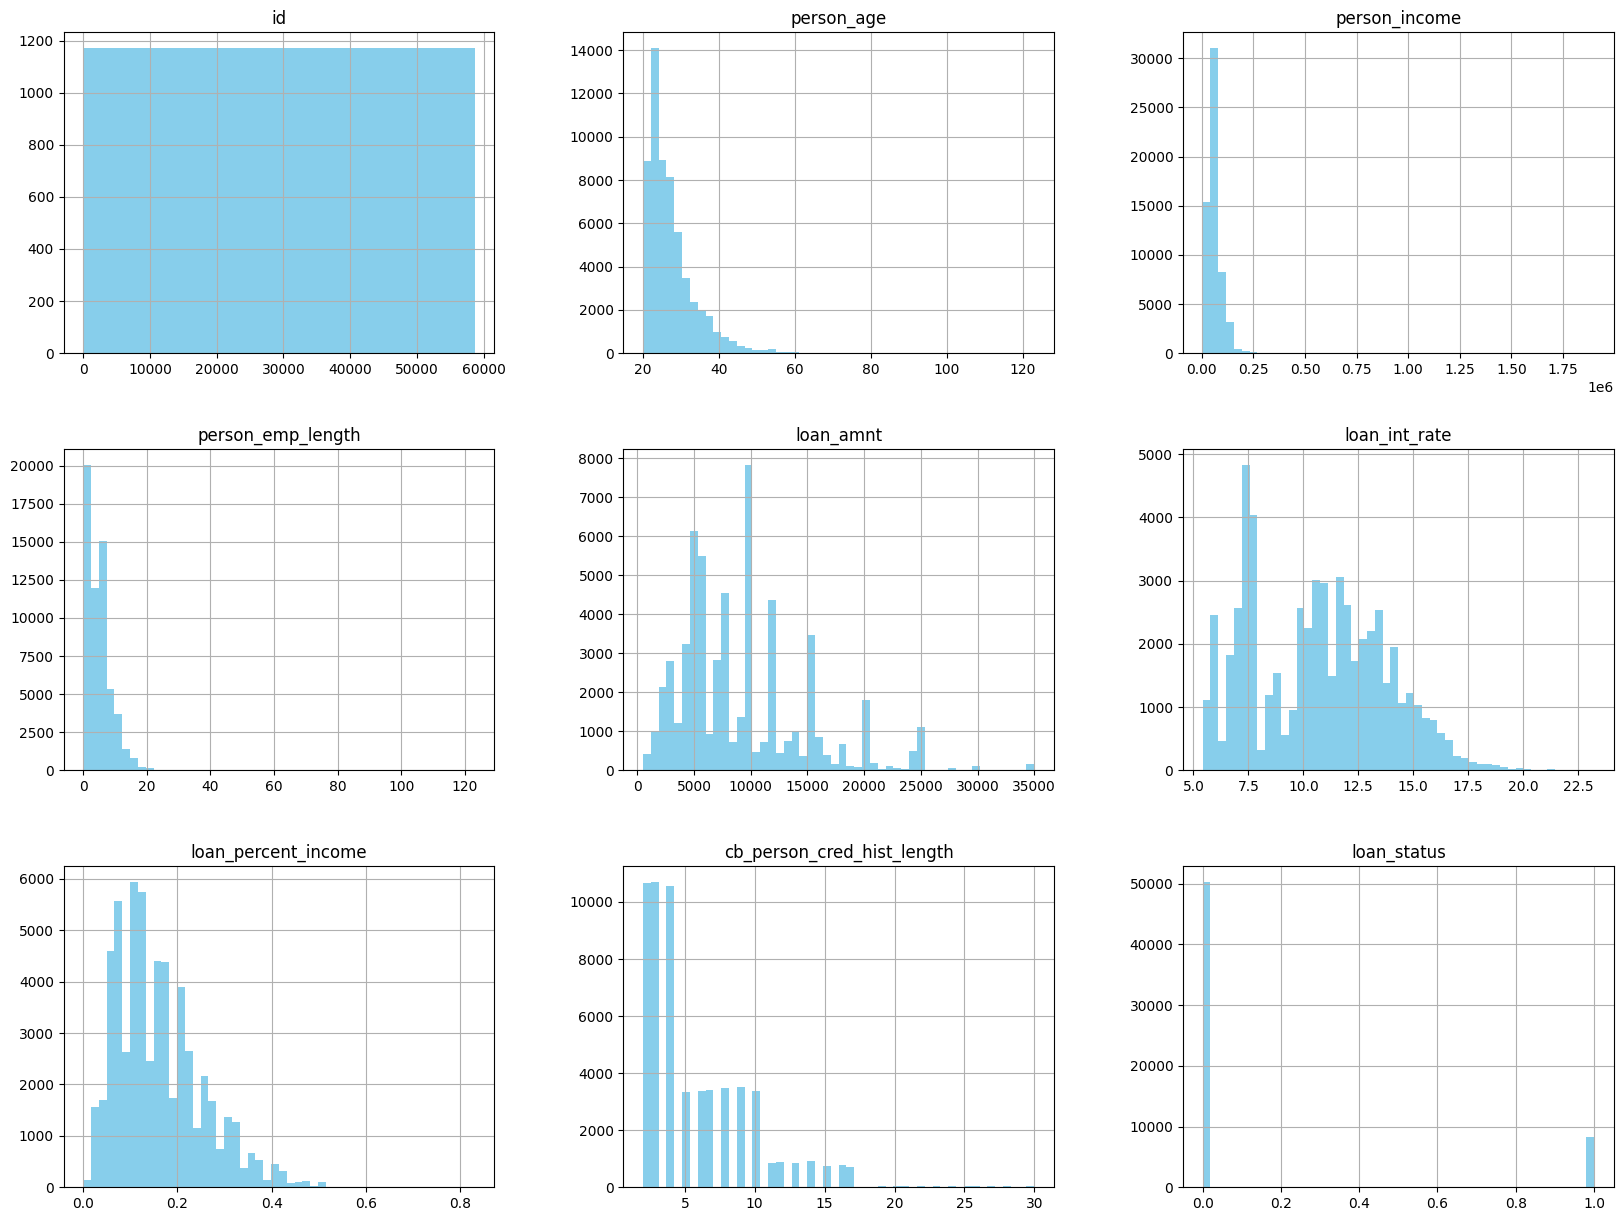

In [111]:
data.hist(bins=50, figsize=(20,15), color='skyblue')

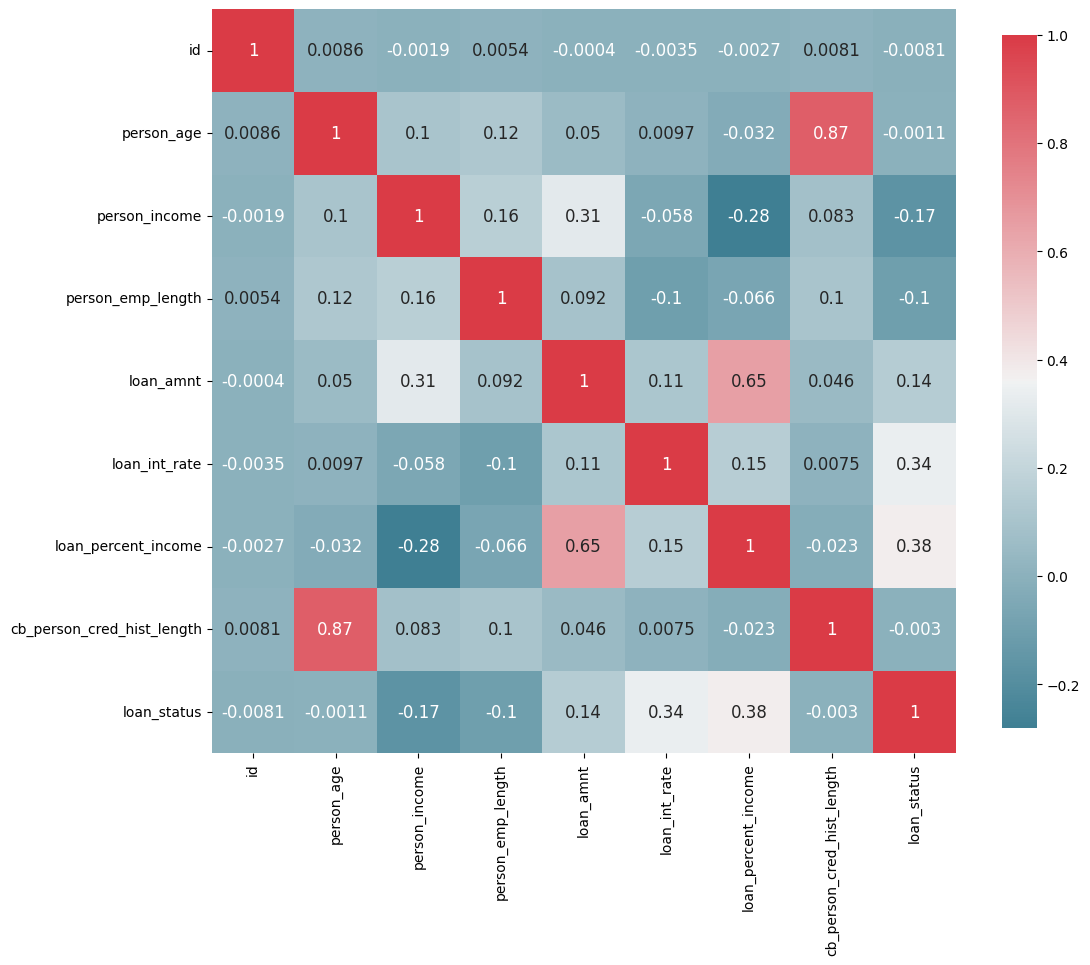

In [121]:
numerical_cols = data.select_dtypes(include=[np.number]).columns
def plot_correlation_map( df ):
	corr = df.corr()
	_ , ax = plt.subplots( figsize =( 12 , 10 ) )
	cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
	_ = sns.heatmap(
		corr, 
		cmap = cmap,
		square=True, 
		cbar_kws={ 'shrink' : .9 }, 
		ax=ax, 
		annot = True, 
		annot_kws = { 'fontsize' : 12 }
	)

plot_correlation_map(data[numerical_cols])

In [123]:
corr_matrix = data.corr(numeric_only=True)

In [128]:
correlataed = pd.DataFrame(corr_matrix['loan_status'].sort_values(ascending=False))

In [132]:
# Squaring the numerical columns
squared_numerical_cols = data[numerical_cols].apply(lambda x: x**2)
root_numerical_cols = data[numerical_cols].apply(lambda x: np.sqrt(x))
square_cols_names = [f"{col}_squared" for col in numerical_cols]
root_cols_names = [f"{col}_root" for col in numerical_cols]

In [133]:
corr_matrix_squared = squared_numerical_cols.corr(numeric_only=True)
corr_matrix_root = root_numerical_cols.corr(numeric_only=True)